## 问题：计算MovieLens 100k数据集中男性女性用户评分的标准差

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_DIR = '/Users/patientman/Desktop/JupyterNoteBook/ml-100k/'

In [3]:
user_data = pd.read_table(os.path.join(DATA_DIR, 'u.data'), sep='\t', names=['user id', 'item id', 'rating', 'timestamp'])

In [4]:
user_info = pd.read_table(os.path.join(DATA_DIR, 'u.user'), sep='|', names=['user id', 'age', 'gender', 'occupation', 'zip code'])

In [5]:
movie_item = pd.read_table(os.path.join(DATA_DIR, 'u.item'), sep='|', encoding='latin-1', names=["movie id","movie title","release date","video release date","IMDb URL","unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"])
# 注意这里需要用latin-1进行encode，否则报错

In [6]:
merge_table = pd.merge(user_data, user_info, on='user id')

In [7]:
# mean_result_table = merge_table.groupby(['user id','gender']).rating.mean()

In [8]:
# 方法1：使用pivot_table作新表求mean，返回DataFrame
mean_result_df = pd.pivot_table(merge_table, index=['user id','gender'],aggfunc={'rating':[np.mean]})

In [9]:
# 方法2：使用DataFrame.groupby(['col1','col2'])['col3'].mean()，返回Series
mean_result_series = merge_table.groupby(['user id','gender'])['rating'].mean()

# 注意：groupby()方法返回的是MultiIndex, 无法直接选择列
# 我们需要使用reset_index转成DataFrame，这样就把多层索引中的值变成列了
mean_result_table = mean_result_series.reset_index() 

## Seaborn绘制小提琴图

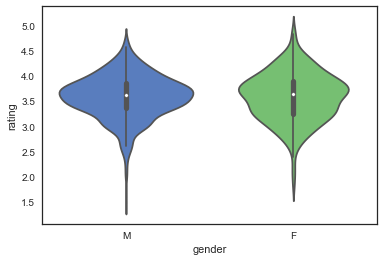

In [10]:
# 使用Seaborn库绘图
sns.set(style='white', palette='muted')
sns.violinplot(x=mean_result_table['gender'], y=mean_result_table['rating'])

## Seaborn绘制散点图

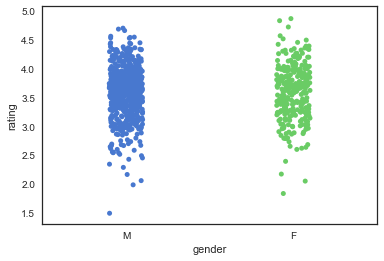

In [11]:
sns.stripplot(x=mean_result_table['gender'], y=mean_result_table['rating'], jitter=True) #jitter使数据分散开

In [12]:
# plt.scatter(x=range(len(mean_result_table['gender'])), y=mean_result_table['rating'])
# plt.show()

## 查看标准差
F是女性，M是男性，得知女性的评分差异大

In [13]:
std_table = mean_result_series.groupby('gender').std()
std_table.name = 'rating standard deviation'
print(std_table)

gender
F    0.481241
M    0.430076
Name: rating standard deviation, dtype: float64
